# Recommendations for sellers
#विक्रेत्यांसाठी शिफारसी
<!-- ---


> *Click the button below and enter the required support & confidence*


> खालील बटणावर क्लिक करा आणि आवश्यक समर्थन आणि आत्मविश्वास प्रविष्ट करा

--- -->





In [0]:

#@markdown *Click the left button to generate new recommendations*
#@markdown *नवीन शिफारसी निर्माण करण्यासाठी डावे बटण क्लिक करा*

import itertools
#   This function generates the first candidate set using the dataset
def generateC1(dataSet):
    productDict = {}
    returneSet = []
    for data in dataSet:
        for product in data:
            if product not in productDict:
               productDict[product] = 1
            else:
                 productDict[product] = productDict[product] + 1
    for key in productDict:
        tempArray = []
        tempArray.append(key)
        returneSet.append(tempArray)
        returneSet.append(productDict[key])
        tempArray = []
    return returneSet

#   This function creates Frequent item sets by taking candidate sets as input
#   At the end, this function calls generateCandidatSets by feeding the output of the
#   current function as the input of the other function
def generateFrequentItemSet(CandidateList, noOfTransactions, minimumSupport, dataSet, fatherFrequentArray):
    frequentItemsArray = []
    for i in range(len(CandidateList)):
        if i%2 != 0:
            support = (CandidateList[i] * 1.0 / noOfTransactions) * 100
            if support >= minimumSupport:
                frequentItemsArray.append(CandidateList[i-1])
                frequentItemsArray.append(CandidateList[i])
            else:
                eleminatedItemsArray.append(CandidateList[i-1])

    for k in frequentItemsArray:
        fatherFrequentArray.append(k)

    if len(frequentItemsArray) == 2 or len(frequentItemsArray) == 0:
        #print("This will be returned")
        returnArray = fatherFrequentArray
        return returnArray

    else:
        generateCandidateSets(dataSet, eleminatedItemsArray, frequentItemsArray, noOfTransactions, minimumSupport)

#   This function creates Candidate sets by taking frequent sets as the input
#   At the end, this function calls generateFrequentItemSets by feeding the output of the
#   crrent function as the input of the other function
def generateCandidateSets(dataSet, eleminatedItemsArray, frequentItemsArray, noOfTransactions, minimumSupport):
    onlyElements = []
    arrayAfterCombinations = []
    candidateSetArray = []
    for i in range(len(frequentItemsArray)):
        if i%2 == 0:
            onlyElements.append(frequentItemsArray[i])
    for item in onlyElements:
        tempCombinationArray = []
        k = onlyElements.index(item)
        for i in range(k + 1, len(onlyElements)):
            for j in item:
                if j not in tempCombinationArray:
                    tempCombinationArray.append(j)
            for m in onlyElements[i]:
                if m not in tempCombinationArray:
                    tempCombinationArray.append(m)
            arrayAfterCombinations.append(tempCombinationArray)
            tempCombinationArray = []
    sortedCombinationArray = []
    uniqueCombinationArray = []
    for i in arrayAfterCombinations:
        sortedCombinationArray.append(sorted(i))
    for i in sortedCombinationArray:
        if i not in uniqueCombinationArray:
            uniqueCombinationArray.append(i)
    arrayAfterCombinations = uniqueCombinationArray
    for item in arrayAfterCombinations:
        count = 0
        for transaction in dataSet:
            if set(item).issubset(set(transaction)):
                count = count + 1
        if count != 0:
            candidateSetArray.append(item)
            candidateSetArray.append(count)
    generateFrequentItemSet(candidateSetArray, noOfTransactions, minimumSupport, dataSet, fatherFrequentArray)

#   This function takes all the frequent sets as the input and generates Association Rules
def generateAssociationRule(freqSet):
    associationRule = []
    for item in freqSet:
        if isinstance(item, list):
            if len(item) != 0:
                length = len(item) - 1
                while length > 0:
                    combinations = list(itertools.combinations(item, length))
                    temp = []
                    LHS = []
                    for RHS in combinations:
                        LHS = set(item) - set(RHS)
                        temp.append(list(LHS))
                        temp.append(list(RHS))
                        #print(temp)
                        associationRule.append(temp)
                        temp = []
                    length = length - 1
    return associationRule

#   This function creates the final output of the algorithm by taking Association Rules as the input
def aprioriOutput(rules, dataSet, minimumSupport, minimumConfidence):
    returnAprioriOutput = []
    for rule in rules:
        supportOfX = 0
        supportOfXinPercentage = 0
        supportOfXandY = 0
        supportOfXandYinPercentage = 0
        for transaction in dataSet:
            if set(rule[0]).issubset(set(transaction)):
                supportOfX = supportOfX + 1
            if set(rule[0] + rule[1]).issubset(set(transaction)):
                supportOfXandY = supportOfXandY + 1
        supportOfXinPercentage = (supportOfX * 1.0 / noOfTransactions) * 100
        supportOfXandYinPercentage = (supportOfXandY * 1.0 / noOfTransactions) * 100
        confidence = (supportOfXandYinPercentage / supportOfXinPercentage) * 100
        if confidence >= minimumConfidence:
          #The below statements can be uncommented to get the output in the form:Support Of X: 72.0  Support Of X&Y: 82.0  Confidence: 72  ['Rajma']------>['Sugarcane']
          #Further set "counter = 4" for the same!
            #supportOfXAppendString = "Support Of X: " + str(round(supportOfXinPercentage, 2))
            #supportOfXandYAppendString = "Support of X & Y: " + str(round(supportOfXandYinPercentage))
            #confidenceAppendString = "Confidence: " + str(round(confidence))

            #returnAprioriOutput.append(supportOfXAppendString)
            #returnAprioriOutput.append(supportOfXandYAppendString)
            #returnAprioriOutput.append(confidenceAppendString)
            returnAprioriOutput.append(rule)

    return returnAprioriOutput

#   These few statements are taking input from the user 
#       Such as:
#           Select a database to mine the data
#           Minimum Support
#           Mnimum Confidence
# print("Select from the following dataset:")
# print("1. Crops")
# print("2. Farming Automobile Accessories")
# print("3. Other Farming Stuff")
# print("\n")
##user defined file,minsup,conf--uncomment below
#fileNameInput = input("Enter number (1,2,3): ")
# minimumSupport = input('Enter minimum Support (base 10): ')
# minimumConfidence = input('Enter minimum Confidence (base 10): ')
minimumSupport = 50
minimumConfidence = 60

print("\n") 
#fileName = "crops.txt"

# if fileNameInput == '1':
#     fileName = "crops.txt"
# if fileNameInput == '2':
#     fileName = "automobileStuff.txt"
# if fileNameInput == '3':
#     fileName = "otherStuff.txt"



minimumSupport = int(minimumSupport)
minimumConfidence = int(minimumConfidence)

nonFrequentSets = []
allFrequentItemSets = []
tempFrequentItemSets = []
dataSet = []
eleminatedItemsArray = []
noOfTransactions = 0
fatherFrequentArray = []
something = 0


# #   Reading the data file line by line
# with open(fileName,'r') as fp:
#     lines = fp.readlines()
#Reading the data file from google drive
with open('/gdrive/My Drive/crops.txt', 'r') as fp:
  lines = fp.readlines()
for line in lines:
    line = line.rstrip()
    dataSet.append(line.split(","))

noOfTransactions = len(dataSet)

firstCandidateSet = generateC1(dataSet)

frequentItemSet = generateFrequentItemSet(firstCandidateSet, noOfTransactions, minimumSupport, dataSet, fatherFrequentArray)

associationRules = generateAssociationRule(fatherFrequentArray)

AprioriOutput = aprioriOutput(associationRules, dataSet, minimumSupport, minimumConfidence)


counter = 1
if len(AprioriOutput) == 0:
    print("There are no association rules for this support and confidence.")
else:
    for i in AprioriOutput:
        if counter == 1:
            print(str(i[0]) + " ---> " + str(i[1]))
            counter = 0
        else:
            print(i, end='  ')
        counter = counter + 1
#!python3 AprioriAlgorithm.py -f crops.txt
#!python3 AprioriAlgorithm.py





['Lal Imli Wheat'] ---> ['Cabbage']
['Cabbage'] ---> ['Lal Imli Wheat']
['Rice'] ---> ['Cabbage']
['Cabbage'] ---> ['Rice']
['Rice'] ---> ['Lal Imli Wheat']
['Lal Imli Wheat'] ---> ['Rice']
['Potato'] ---> ['Lal Imli Wheat']
['Lal Imli Wheat'] ---> ['Potato']
['Mp Sortex Wheat'] ---> ['Bajra']
['Bajra'] ---> ['Mp Sortex Wheat']
['Rice'] ---> ['Bajra']
['Bajra'] ---> ['Rice']
['Mp Sortex Wheat'] ---> ['Ginger']
['Ginger'] ---> ['Mp Sortex Wheat']
['Rice'] ---> ['Mp Sortex Wheat']
['Mp Sortex Wheat'] ---> ['Rice']
['Rice'] ---> ['Brinjal']
['Brinjal'] ---> ['Rice']
['Rice'] ---> ['Potato']
['Potato'] ---> ['Rice']
['Potato'] ---> ['Brinjal']
['Brinjal'] ---> ['Potato']


In [0]:
#@title Warning! (चेतावणी!)
%%html
<marquee style='width: 100%; color: red;'><b>Above recommendations are Trend Based !</b></marquee>

<marquee style='width: 100%; color: red;'><b>वरील शिफारसी ट्रेंड आधारित शिफारसी आहेत!</b></marquee>

#Explanation 
# शिफारसी नियमांचे स्पष्टीकरण



---


English:
> ['Wheat']------>['Rice']

> The above rule means, crops at the left hand side of    "------>" are crops that are currently grown by farmers while crops on the right hand side of "------>" are recommended crops to the farmers.




> Thus according to above rule if you grow 'wheat' currently then you can grow 'rice' as there is high demand for rice with wheat.





---
Marathi:

> ['गहू'] ------> ['तांदूळ']

> वरील नियम म्हणजे, "------>" च्या डाव्या बाजूकडील पिके म्हणजे सध्या शेतकर्यांद्वारे उगवलेली पिके आहेत तर "------>" च्या उजवीकडील पिके म्हणजे शिफारस केलेली पिके आहेत.



> अशा प्रकारे वरील नियमानुसार आपण सध्या गव्हाचे पीक घेतले तर आपण तांदूळ पेरू शकता कारण गव्हासह तांदूळांची जास्त मागणी आहे.





---




# Video Recommendations
# व्हिडिओ शिफारसी

In [0]:
#@title Best Practices(सर्वोत्तम अभ्यास)

%%html



<marquee style='width: 100%; color: blue;'><b>Get video recommendations and best practices from peer farmers!</b></marquee>

<marquee style='width: 100%; color: blue;'><b>सहकारी शेतकर्यां कडून व्हिडिओ शिफारसी आणि सर्वोत्तम पद्धती मिळवा!</b></marquee>

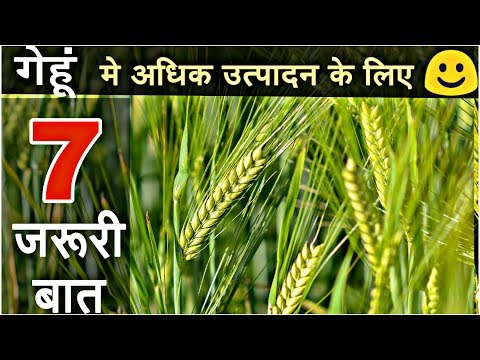

In [0]:
#@markdown This video gives Best farming tips for more production of wheat crop:
#@markdown हा व्हिडिओ गहू पिकाच्या अधिक उत्पादनासाठी उत्तम शेतीविषयक टीपा देते:
from IPython.display import YouTubeVideo
YouTubeVideo('_ULc_pkwMPA', width=300, height=200)


#Rule Generation simple:
Following is apriori that requires no input from user side but transaction data collection is listed.



In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
!pip install efficient-apriori
#docs:https://buildmedia.readthedocs.org/media/pdf/efficient-apriori/latest/efficient-apriori.pdf
from efficient_apriori import apriori
transactions = [('eggs', 'bacon', 'soup'),
                ('eggs', 'bacon', 'apple'),
                ('soup', 'bacon', 'banana')]
itemsets, rules = apriori(transactions, min_support=0.2,  min_confidence=1)

#simple rule print
print(rules)
# Print out every rule with 2 items on the left hand side,
# 1 item on the right hand side, sorted by lift
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule) # Prints the rule and its confidence, support, lift, ...
 

[{apple} -> {bacon}, {apple} -> {eggs}, {banana} -> {bacon}, {eggs} -> {bacon}, {soup} -> {bacon}, {banana} -> {soup}, {apple, eggs} -> {bacon}, {apple, bacon} -> {eggs}, {apple} -> {bacon, eggs}, {banana, soup} -> {bacon}, {bacon, banana} -> {soup}, {banana} -> {bacon, soup}, {eggs, soup} -> {bacon}]
{apple, eggs} -> {bacon} (conf: 1.000, supp: 0.333, lift: 1.000, conv: 0.000)
{banana, soup} -> {bacon} (conf: 1.000, supp: 0.333, lift: 1.000, conv: 0.000)
{eggs, soup} -> {bacon} (conf: 1.000, supp: 0.333, lift: 1.000, conv: 0.000)
{apple, bacon} -> {eggs} (conf: 1.000, supp: 0.333, lift: 1.500, conv: 333333333.333)
{bacon, banana} -> {soup} (conf: 1.000, supp: 0.333, lift: 1.500, conv: 333333333.333)
